In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv("mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x=dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

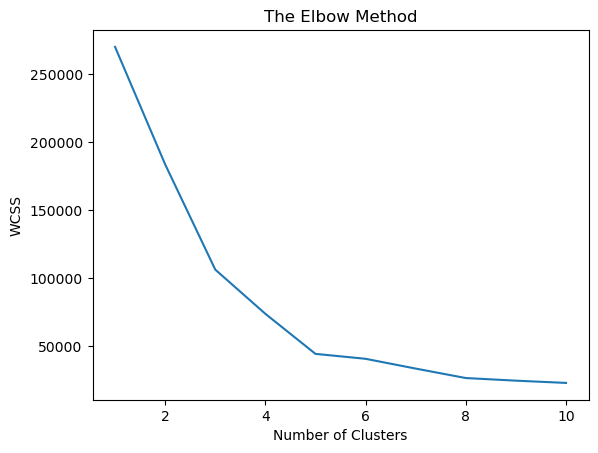

In [21]:
from sklearn.cluster import KMeans,MeanShift

# Assuming 'x' is your dataset (replace it with your data)
# x = <your_data>

list1 = []  # To store WCSS values
for i in range(1, 11):
    # Loop through different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    list1.append(kmeans.inertia_)  # Append WCSS to the list

# Plot the Elbow graph
plt.plot(range(1, 11), list1)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Affinity Propagation
ms = MeanShift(bandwidth=2).fit(x)
y_ms = ms.fit_predict(x)


In [24]:
y_ms

array([137, 136,  42,  43, 135,  43,  42, 134, 133, 132,  19, 131,  19,
        41,  19,  41, 130, 129, 128, 127, 126,  40, 125,  40, 124, 122,
        39, 123,  39, 121, 120, 119, 118, 115, 117, 116, 114, 113, 112,
       111,  38, 110,  38, 108, 109, 107, 105, 106,  37,  37, 104,  36,
       102,  36,  18, 103, 101,  18,   6,  18,  35,  35,   6,  17,   6,
        17,   6,  16,  17,  16,  34, 100,  99,  34,  14,   2,   2,  14,
         2,  33,   2,  13,  33,  15,  13,  14,  98,  32,  96,  97,  32,
         5,   1,   5,   5,  11,   1,   1,   0,   1,   0,   4,  95,  12,
        12,   0,   3,   4,  10,   4,  11,  12,  10,   4,   3,   3,  31,
        94,  31,  30,  30,  93,  92,  91,  90,  89,  27,  88,  29,  28,
        29,  28,  27,  87,   9,  86,   9,  26,  85,  26,   9,  84,  83,
        82,  81,  79,  80,  25,  22,   8,  23,   8,  22,  21,  23,   8,
        24,  21,  24,  25,  78,  77,  76,  75,  74,  20,  73,  72,  70,
        69,   7,  20,  71,  68,   7,  66,   7,  67,  65,  64,  6

In [26]:
supervised=dataset

In [28]:
supervised['Cluster_group']=y_ms

C:\Anaconda\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


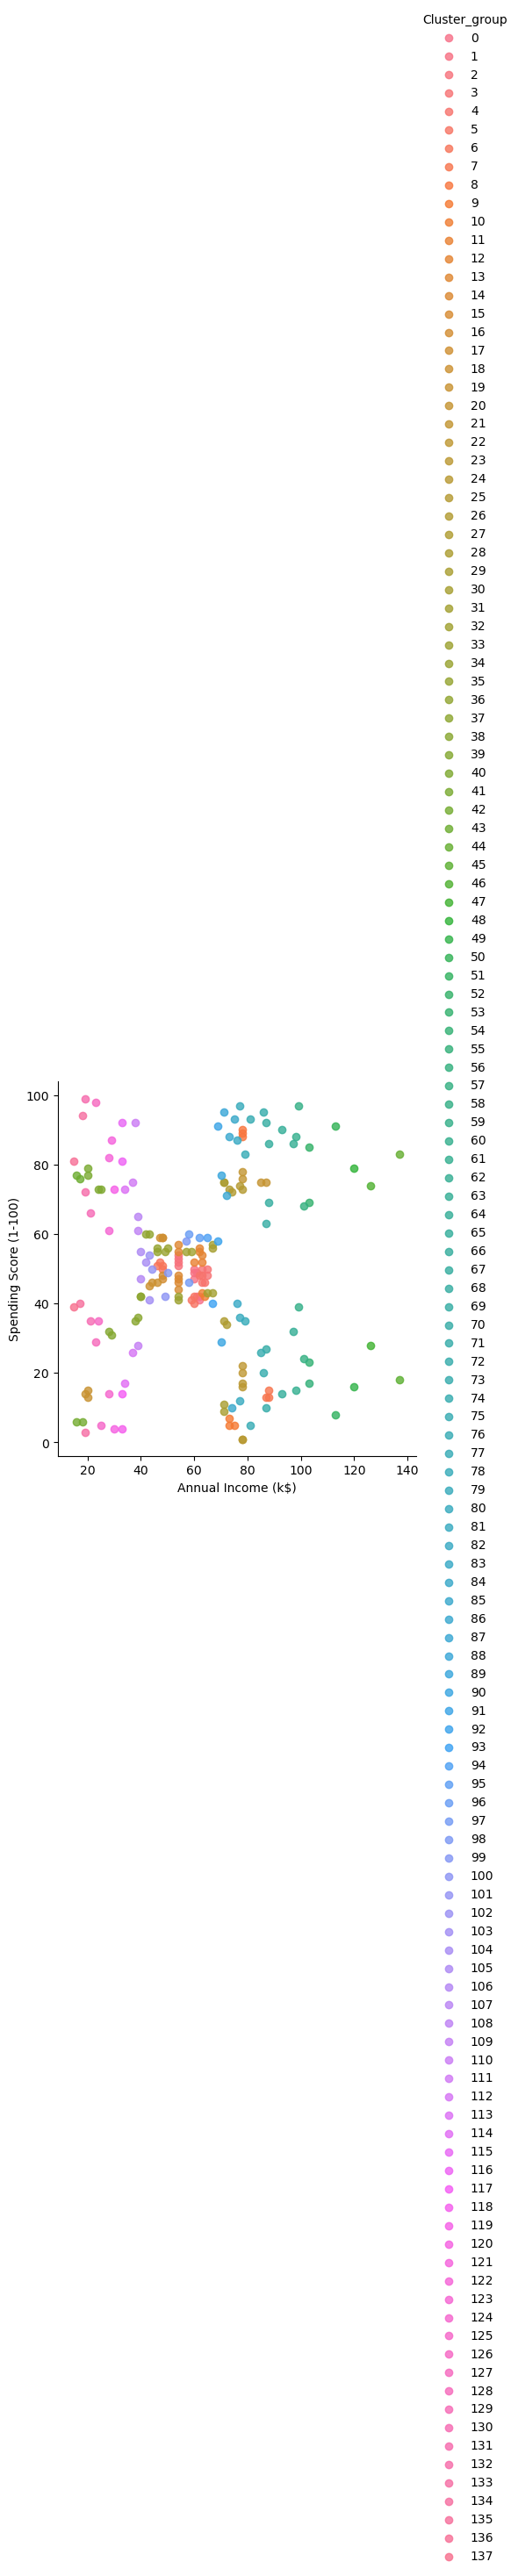

In [30]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)